In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
df = pd.read_csv(r"C:\Users\gopal\OneDrive\Machine_learning\churn_project\Customer-Behavior-Clustering\data\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Selecting relevant features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

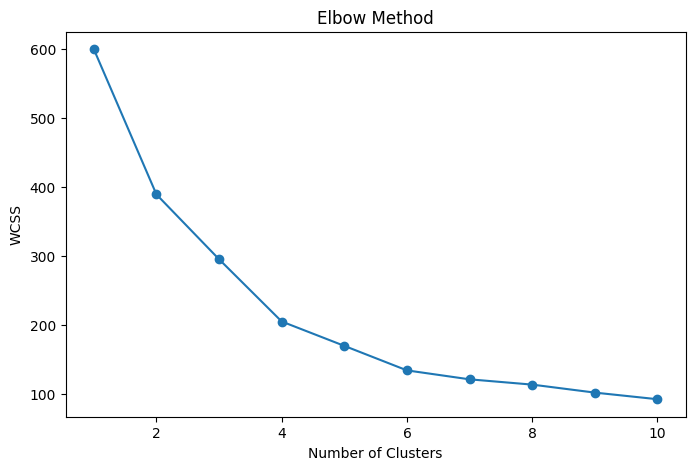

In [6]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


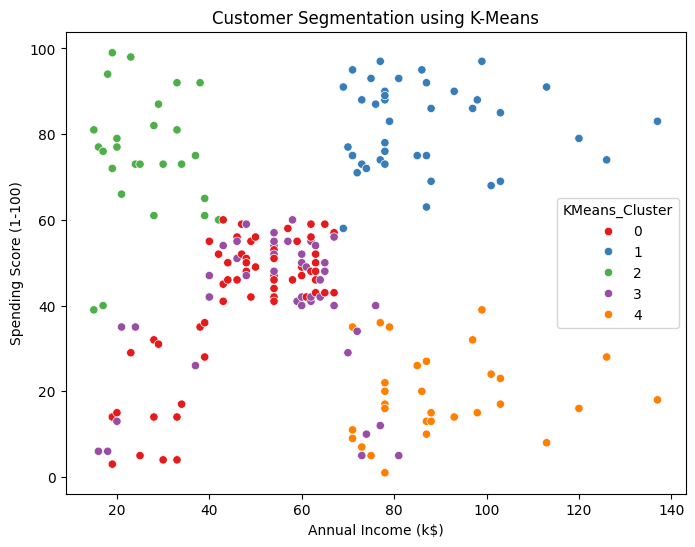

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['KMeans_Cluster'],
    palette='Set1'
)
plt.title("Customer Segmentation using K-Means")
plt.show()

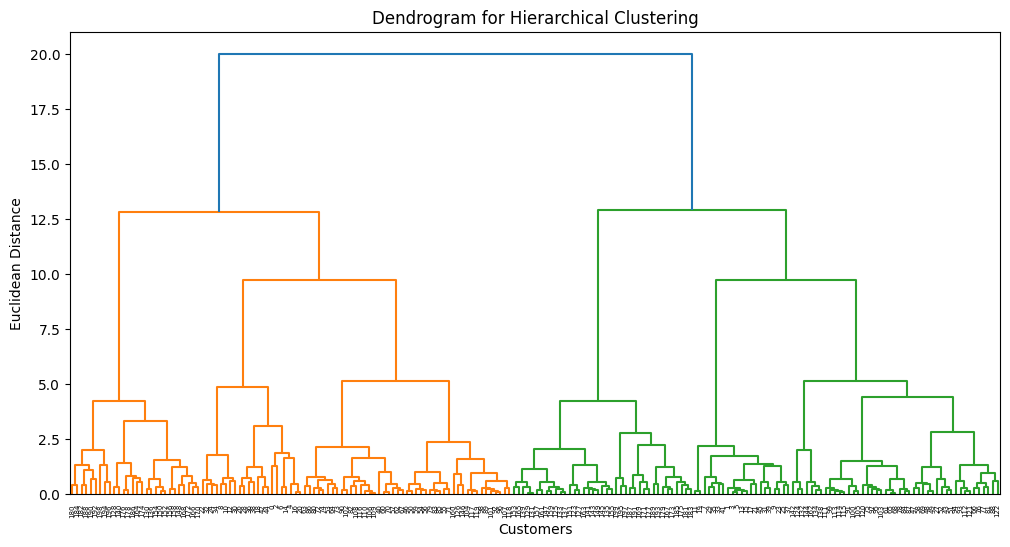

In [9]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

In [10]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Hierarchical_Cluster'] = hc.fit_predict(X_scaled)

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,Hierarchical_Cluster
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,3,4
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,4


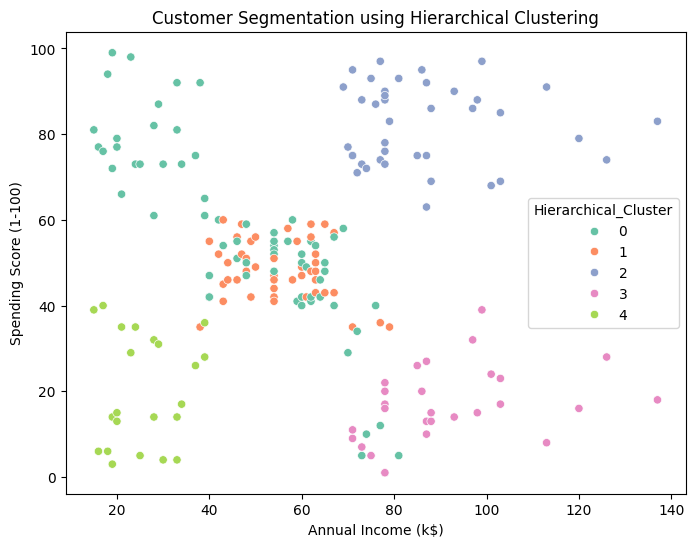

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Hierarchical_Cluster'],
    palette='Set2'
)
plt.title("Customer Segmentation using Hierarchical Clustering")
plt.show()

In [12]:
comparison = df[['KMeans_Cluster', 'Hierarchical_Cluster']]
comparison.head(10)

,KMeans_Cluster,Hierarchical_Cluster
0,2,4
1,2,0
2,3,4
3,2,0
4,2,4
5,2,0
6,3,4
7,2,0
8,0,4
9,2,0
